In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Целевой столбец:

**lastsoldprice** - Цена продажи недвижимости

Столбцы:

'Unnamed: 0' - 

'address' - 

'info' - 

'z_address' - 

'bathrooms' - 

'bedrooms' - 

'finishedsqft' -

'latitude' - 

'longitude' - 

'neighborhood' - 

'totalrooms' - 

'usecode' - 

'yearbuilt' - 

'zestimate' - 

'zindexvalue' - 

'zipcode' - 

'zpid' - 

In [308]:
data = pd.read_csv('data/final_data.csv')
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [3]:
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [4]:
data.loc[:, 'zipcode'] = data['zipcode'].astype(int).astype(str)

In [5]:
# data.loc[:, 'z_address'] = data['z_address'] + ' WOW'
clear_streets = data['z_address'].str.replace(r'[0-9A-Z\-]+ ', '').str.replace(' (?:St|Ave|Aly|Pl|Blvd|Dr|APT|Ct|Cir|Way|Ter|Ln|Park|Mar|Hwy|Hls|#|Row|WOW).+$', '')
clear_streets.columns = ['street']
data.loc[:, 'z_address'] = clear_streets

In [6]:
clear_streets.value_counts()

King            166
1st             134
Van Ness        115
California       93
Sutter           88
               ... 
Woodside Ave      1
Hampshire         1
Huron             1
Broadway 102      1
Seward            1
Name: z_address, Length: 1403, dtype: int64

In [7]:
data.loc[:, 'lastsolddate'] = pd.to_datetime(data['lastsolddate'])

In [8]:
data['usecode'].value_counts()

SingleFamily        5803
Condominium         4802
MultiFamily2To4      486
Duplex               146
Townhouse             66
Miscellaneous         17
Cooperative            3
Apartment              3
MultiFamily5Plus       2
Mobile                 2
Name: usecode, dtype: int64

In [9]:
data.loc[data['usecode'].isin(['Apartment', 'Cooperative', 'Mobile']), 'usecode'] = 'Miscellaneous'

In [10]:
data['lastsolddate'].sort_values()[3:]

8435    1988-06-01
3975    1992-03-27
6834    1996-04-25
3797    1996-06-07
10831   1996-10-02
           ...    
10772   2016-03-16
8131    2016-03-18
8930    2016-03-18
9142    2016-03-22
8677    2016-03-28
Name: lastsolddate, Length: 11327, dtype: datetime64[ns]

In [11]:
data = data.query('lastsolddate > "2013-01-01"')
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,Mission,2.0,2.0,1043.0,2016-02-17,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,King,1.0,1.0,903.0,2016-02-17,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,Missouri,4.0,3.0,1425.0,2016-02-17,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,Missouri St,3.0,3.0,2231.0,2016-02-17,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,Folsom St,3.0,3.0,1300.0,2016-02-17,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110,15161978.0


In [12]:
def quartal(month):
    if month < 4:
        return 1
    if month < 7:
        return 2
    if month < 10:
        return 3
    return 4

data.loc[:, 'quartal'] = data['lastsolddate'].apply(lambda x: quartal(x.month))
data.loc[:, 'sales_year'] = data['lastsolddate'].dt.year

In [13]:
data['quartal'].value_counts()

3    2652
4    2621
1    2422
2    2142
Name: quartal, dtype: int64

### Визуализировать зависимость с реальной стоимостью. Гипотеза - соотношение цены реальной и оценочной

In [14]:
lot_size = data['info'].str.extract('Lot size: ([0-9]+)')
lot_size.columns = ['lot_size']
data.loc[:, 'lot_size'] = lot_size['lot_size']
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,...,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,quartal,sales_year,lot_size
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,Mission,2.0,2.0,1043.0,2016-02-17,1300000.0,37.778705,...,4.0,Condominium,2007.0,1167508.0,"975,700",94103,83152781.0,1,2016,43557
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,King,1.0,1.0,903.0,2016-02-17,750000.0,37.777641,...,3.0,Condominium,2004.0,823719.0,"975,700",94107,69819817.0,1,2016,213232
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,Missouri,4.0,3.0,1425.0,2016-02-17,1495000.0,37.759198,...,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0,1,2016,2496
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,Missouri St,3.0,3.0,2231.0,2016-02-17,2700000.0,37.761886,...,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107,15149489.0,1,2016,2469
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,Folsom St,3.0,3.0,1300.0,2016-02-17,1530000.0,37.740795,...,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110,15161978.0,1,2016,1750


Идеи:


In [309]:
data.drop(['Unnamed: 0', 'address', 'info', 'lastsolddate'], axis=1, inplace=True)
# data.drop(['lastsolddate'], axis=1, inplace=True)

In [16]:
data['zindexvalue'].value_counts()
data['zpid'].value_counts()

82785427.0     5
79843553.0     4
59779814.0     4
15143549.0     4
124397641.0    3
              ..
15130448.0     1
15074172.0     1
15130480.0     1
15130507.0     1
122064190.0    1
Name: zpid, Length: 9204, dtype: int64

In [17]:
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,quartal,sales_year,lot_size
0,Mission,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103,83152781.0,1,2016,43557
1,King,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107,69819817.0,1,2016,213232
2,Missouri,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0,1,2016,2496
3,Missouri St,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107,15149489.0,1,2016,2469
4,Folsom St,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110,15161978.0,1,2016,1750


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9837 entries, 0 to 11329
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   z_address      9837 non-null   object 
 1   bathrooms      9837 non-null   float64
 2   bedrooms       9837 non-null   float64
 3   finishedsqft   9837 non-null   float64
 4   lastsoldprice  9837 non-null   float64
 5   latitude       9837 non-null   float64
 6   longitude      9837 non-null   float64
 7   neighborhood   9837 non-null   object 
 8   totalrooms     9837 non-null   float64
 9   usecode        9837 non-null   object 
 10  yearbuilt      9837 non-null   float64
 11  zestimate      9837 non-null   float64
 12  zindexvalue    9837 non-null   object 
 13  zipcode        9837 non-null   object 
 14  zpid           9837 non-null   float64
 15  quartal        9837 non-null   int64  
 16  sales_year     9837 non-null   int64  
 17  lot_size       9837 non-null   object 
dtypes: floa

In [19]:
data.isna().sum()

z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
quartal          0
sales_year       0
lot_size         0
dtype: int64

In [20]:
data.drop(['quartal', 'sales_year', 'latitude', 'longitude'], axis=1).describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,totalrooms,yearbuilt,zestimate,zpid
count,9837.000000,9837.000000,9837.000000,9.837000e+03,9837.000000,9837.000000,9.837000e+03,9.837000e+03
mean,1.978566,2.609129,1582.079191,1.310097e+06,6.101149,1948.699299,1.561284e+06,3.726607e+07
std,1.045738,1.290316,925.706367,1.074917e+06,12.969873,38.155056,1.228311e+06,7.717474e+07
min,0.500000,0.000000,1.000000,5.350000e+02,1.000000,1860.000000,4.323850e+05,1.506329e+07
25%,1.000000,2.000000,1012.000000,7.580000e+05,4.000000,1915.000000,9.056210e+05,1.510974e+07
50%,2.000000,2.000000,1360.000000,1.030000e+06,5.000000,1940.000000,1.227834e+06,1.515773e+07
75%,2.000000,3.000000,1876.000000,1.498000e+06,7.000000,1987.000000,1.723562e+06,5.977954e+07
max,14.000000,20.000000,27275.000000,2.388900e+07,1264.000000,2016.000000,1.553325e+07,2.117406e+09


<Figure size 720x1152 with 0 Axes>

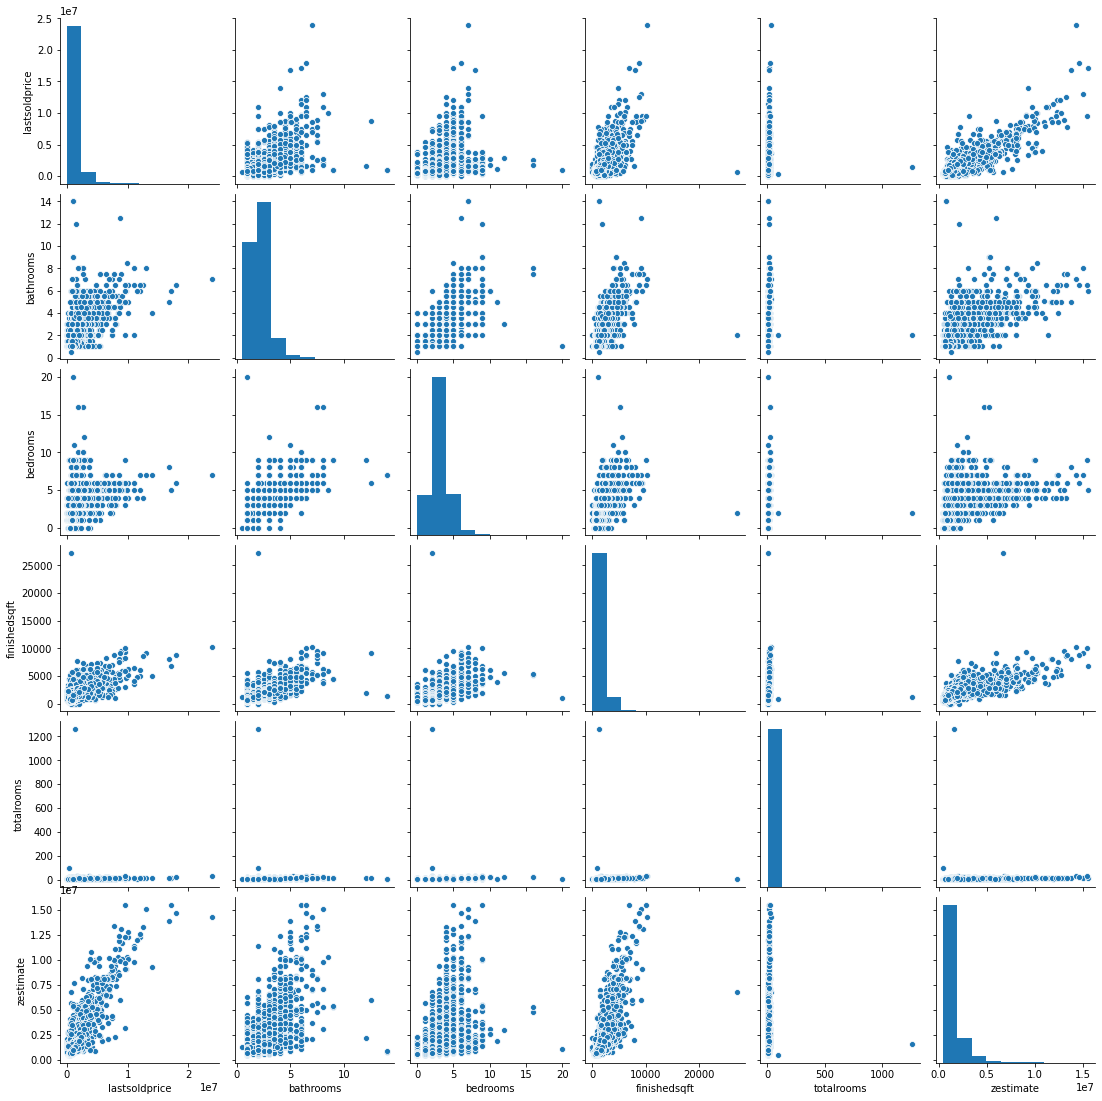

In [21]:
# plt.figure(figsize=(10, 16))
# sns.pairplot(data[['lastsoldprice', 'bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'zestimate']])
# plt.show()

<Figure size 720x1152 with 0 Axes>

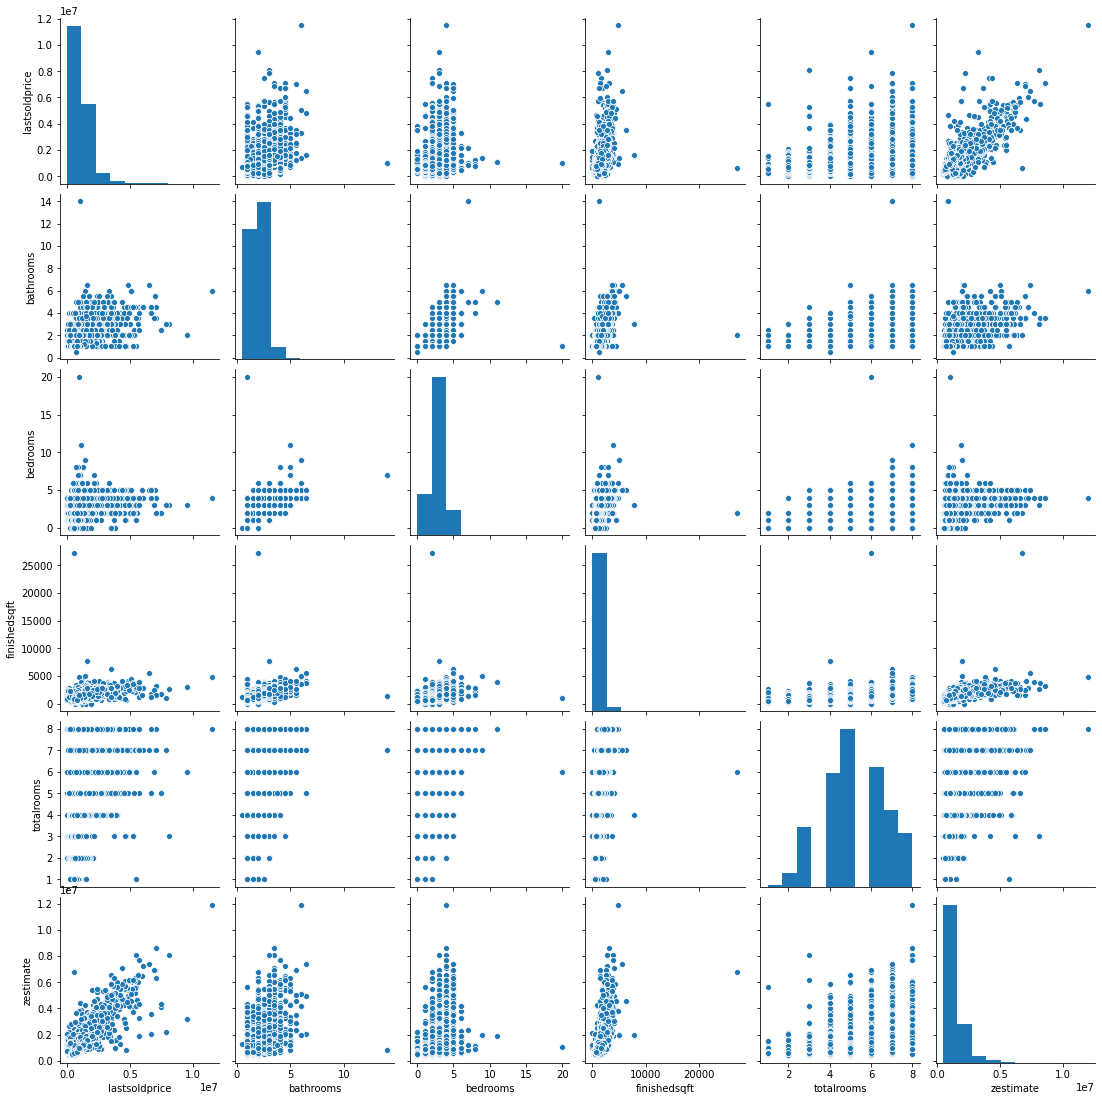

In [22]:
# plt.figure(figsize=(10, 16))
# sns.pairplot(data[data['totalrooms'] < data['totalrooms'].quantile(0.9)][['lastsoldprice', 'bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'zestimate']])
# plt.show()

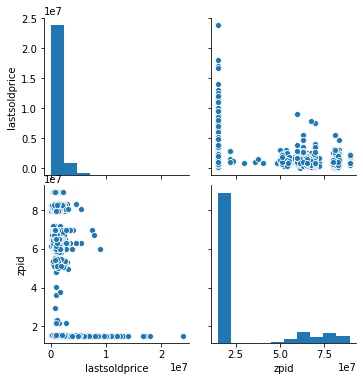

In [23]:
# sns.pairplot(data[data['zpid'] < data['zpid'].quantile(0.9)][['lastsoldprice', 'zpid']])

#### На что стоит обратить внимание:
- totalrooms (невероятный max)
- bathrooms 0.5
- bedrooms 0
- finishedsqft - Max
- finishedsqft - Min

In [24]:
data.shape

(9837, 18)

In [25]:
data = data[data['totalrooms'] < 20]

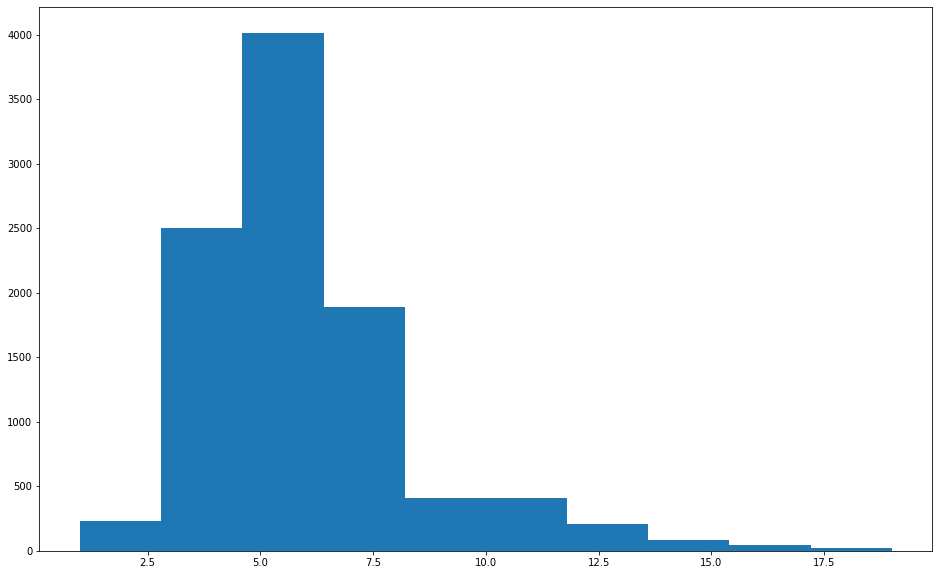

In [26]:
ax = plt.figure(figsize=(16,10))
plt.hist(data['totalrooms'])
plt.show()

In [27]:
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zpid,quartal,sales_year
count,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.00000,9.814000e+03,9.814000e+03,9814.000000,9814.000000
mean,1.972453,2.600469,1574.167720,1.304614e+06,37.759709,-122.436294,5.928571,1948.78174,1.552814e+06,3.730737e+07,2.556348,2014.148869
std,1.033798,1.268195,904.044684,1.044304e+06,0.025525,0.030811,2.438627,38.13507,1.200437e+06,7.725351e+07,1.127839,0.881291
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.00000,4.323850e+05,1.506329e+07,1.000000,2013.000000
25%,1.000000,2.000000,1012.000000,7.576250e+05,37.739394,-122.454544,4.000000,1915.00000,9.052912e+05,1.510992e+07,2.000000,2013.000000
50%,2.000000,2.000000,1360.000000,1.030000e+06,37.760525,-122.432236,5.000000,1940.00000,1.225916e+06,1.515802e+07,3.000000,2014.000000
75%,2.000000,3.000000,1874.750000,1.495000e+06,37.781386,-122.413230,7.000000,1987.00000,1.719306e+06,5.977956e+07,4.000000,2015.000000
max,14.000000,20.000000,27275.000000,1.800000e+07,37.806083,-122.381201,19.000000,2016.00000,1.553325e+07,2.117406e+09,4.000000,2016.000000


In [28]:
data.query('bathrooms < 10').shape

(9810, 18)

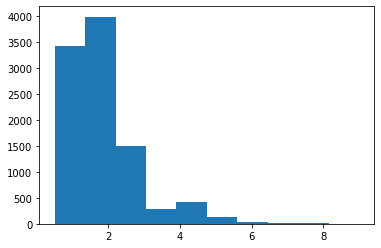

In [29]:
plt.hist(data.query('bathrooms < 10')['bathrooms'])
plt.show()

In [30]:
data = data.query('bathrooms < 10')
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zpid,quartal,sales_year
count,9810.000000,9810.000000,9810.000000,9.810000e+03,9810.000000,9810.000000,9810.000000,9810.000000,9.810000e+03,9.810000e+03,9810.000000,9810.000000
mean,1.967905,2.598573,1573.423853,1.303885e+06,37.759716,-122.436290,5.927013,1948.763609,1.552456e+06,3.730656e+07,2.556065,2014.148828
std,1.009013,1.264781,900.996462,1.041759e+06,0.025518,0.030814,2.436757,38.125776,1.199793e+06,7.726463e+07,1.127858,0.881309
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,1.506329e+07,1.000000,2013.000000
25%,1.000000,2.000000,1012.000000,7.571250e+05,37.739397,-122.454543,4.000000,1915.000000,9.053845e+05,1.510992e+07,2.000000,2013.000000
50%,2.000000,2.000000,1360.000000,1.030000e+06,37.760526,-122.432236,5.000000,1940.000000,1.225916e+06,1.515798e+07,3.000000,2014.000000
75%,2.000000,3.000000,1874.750000,1.495000e+06,37.781386,-122.413230,7.000000,1987.000000,1.719109e+06,5.977956e+07,4.000000,2015.000000
max,9.000000,20.000000,27275.000000,1.800000e+07,37.806083,-122.381201,19.000000,2016.000000,1.553325e+07,2.117406e+09,4.000000,2016.000000


In [31]:
data.loc[:, 'half_bath'] = (data['bathrooms'] % 1 > 0).astype(int)
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,quartal,sales_year,lot_size,half_bath
0,Mission,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103,83152781.0,1,2016,43557,0
1,King,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107,69819817.0,1,2016,213232,0
2,Missouri,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0,1,2016,2496,0
3,Missouri St,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107,15149489.0,1,2016,2469,0
4,Folsom St,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110,15161978.0,1,2016,1750,0


In [32]:
data['half_bath'].value_counts()

0    8482
1    1328
Name: half_bath, dtype: int64

In [33]:
data.loc[:, 'bathrooms'] = np.floor(data['bathrooms'])
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,quartal,sales_year,lot_size,half_bath
0,Mission,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103,83152781.0,1,2016,43557,0
1,King,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107,69819817.0,1,2016,213232,0
2,Missouri,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0,1,2016,2496,0
3,Missouri St,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107,15149489.0,1,2016,2469,0
4,Folsom St,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110,15161978.0,1,2016,1750,0


In [34]:
data['bedrooms'].describe()

count    9810.000000
mean        2.598573
std         1.264781
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: bedrooms, dtype: float64

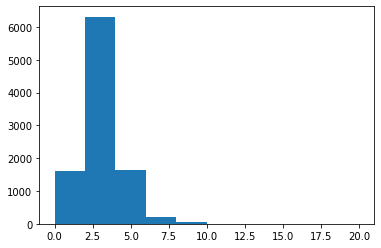

In [35]:
plt.hist(data['bedrooms'])
plt.show()

In [36]:
data.loc[data['bedrooms'] == 0, 'bedrooms'] = 1
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zpid,quartal,sales_year,half_bath
count,9810.000000,9810.000000,9810.000000,9.810000e+03,9810.000000,9810.000000,9810.000000,9810.000000,9.810000e+03,9.810000e+03,9810.000000,9810.000000,9810.000000
mean,1.901223,2.610703,1573.423853,1.303885e+06,37.759716,-122.436290,5.927013,1948.763609,1.552456e+06,3.730656e+07,2.556065,2014.148828,0.135372
std,0.977121,1.244430,900.996462,1.041759e+06,0.025518,0.030814,2.436757,38.125776,1.199793e+06,7.726463e+07,1.127858,0.881309,0.342138
min,0.000000,1.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,1.506329e+07,1.000000,2013.000000,0.000000
25%,1.000000,2.000000,1012.000000,7.571250e+05,37.739397,-122.454543,4.000000,1915.000000,9.053845e+05,1.510992e+07,2.000000,2013.000000,0.000000
50%,2.000000,2.000000,1360.000000,1.030000e+06,37.760526,-122.432236,5.000000,1940.000000,1.225916e+06,1.515798e+07,3.000000,2014.000000,0.000000
75%,2.000000,3.000000,1874.750000,1.495000e+06,37.781386,-122.413230,7.000000,1987.000000,1.719109e+06,5.977956e+07,4.000000,2015.000000,0.000000
max,9.000000,20.000000,27275.000000,1.800000e+07,37.806083,-122.381201,19.000000,2016.000000,1.553325e+07,2.117406e+09,4.000000,2016.000000,1.000000


In [37]:
data.query('bedrooms == 0')['lastsoldprice'].mean()

nan

In [38]:
data.shape, data.query('bedrooms < 8').shape

((9810, 19), (9764, 19))

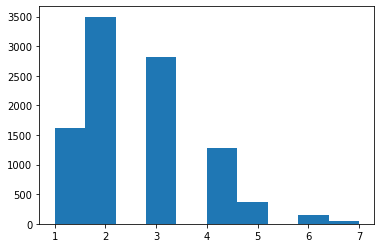

In [39]:
plt.hist(data.query('bedrooms < 8')['bedrooms'])
plt.show()

In [40]:
data = data.query('bedrooms < 8')

In [41]:
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zpid,quartal,sales_year,half_bath
count,9764.000000,9764.000000,9764.000000,9.764000e+03,9764.000000,9764.000000,9764.000000,9764.000000,9.764000e+03,9.764000e+03,9764.000000,9764.000000,9764.000000
mean,1.886112,2.580193,1561.660488,1.300915e+06,37.759688,-122.436265,5.890107,1948.895432,1.545320e+06,3.739456e+07,2.556329,2014.148505,0.135805
std,0.946016,1.155981,881.507200,1.031083e+06,0.025526,0.030838,2.367260,38.115197,1.189197e+06,7.742661e+07,1.127534,0.880710,0.342599
min,0.000000,1.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,1.506329e+07,1.000000,2013.000000,0.000000
25%,1.000000,2.000000,1011.000000,7.560000e+05,37.739384,-122.454544,4.000000,1916.000000,9.046238e+05,1.511025e+07,2.000000,2013.000000,0.000000
50%,2.000000,2.000000,1355.000000,1.030000e+06,37.760480,-122.432209,5.000000,1940.000000,1.224197e+06,1.515828e+07,3.000000,2014.000000,0.000000
75%,2.000000,3.000000,1863.250000,1.485625e+06,37.781386,-122.413201,7.000000,1987.000000,1.711991e+06,5.977967e+07,4.000000,2015.000000,0.000000
max,8.000000,7.000000,27275.000000,1.800000e+07,37.806083,-122.381201,19.000000,2016.000000,1.553325e+07,2.117406e+09,4.000000,2016.000000,1.000000


In [42]:
data = data.query('200 < finishedsqft < 10000')

In [43]:
data

,z_address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,quartal,sales_year,lot_size,half_bath
0,Mission,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103,83152781.0,1,2016,43557,0
1,King,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107,69819817.0,1,2016,213232,0
2,Missouri,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0,1,2016,2496,0
3,Missouri St,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107,15149489.0,1,2016,2469,0
4,Folsom St,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110,15161978.0,1,2016,1750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,Laidley St,2.0,3.0,2100.0,1950000.0,37.739623,-122.428899,Glen Park,10.0,SingleFamily,1900.0,1895813.0,"1,628,900",94131,15184023.0,1,2016,2500,0
11326,Tehama,2.0,2.0,977.0,1030000.0,37.775184,-122.411567,South of Market,5.0,MultiFamily2To4,2006.0,999443.0,"957,300",94103,79845585.0,1,2016,1554,0
11327,De Long St,1.0,2.0,875.0,565000.0,37.709411,-122.465031,Outer Mission,4.0,SingleFamily,1950.0,639167.0,"804,400",94112,15196286.0,1,2016,2256,0
11328,48th Ave,1.0,2.0,697.0,762000.0,37.755586,-122.508063,Outer Sunset,4.0,SingleFamily,1904.0,703197.0,"1,030,300",94122,15108054.0,1,2016,2996,0


In [44]:
data.loc[:, 'otherrooms'] = data['totalrooms'] - data['bedrooms']

In [45]:
data[data['totalrooms'] != (data['bathrooms'] + data['bedrooms'])]

,z_address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,quartal,sales_year,lot_size,half_bath,otherrooms
1,King,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107,69819817.0,1,2016,213232,0,2.0
2,Missouri,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0,1,2016,2496,0,3.0
3,Missouri St,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107,15149489.0,1,2016,2469,0,7.0
4,Folsom St,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110,15161978.0,1,2016,1750,0,1.0
5,Lowell St,1.0,2.0,1250.0,460000.0,37.710226,-122.446027,Crocker Amazon,5.0,SingleFamily,1924.0,703392.0,"823,000",94112,15178981.0,1,2016,3000,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,Laidley St,2.0,3.0,2100.0,1950000.0,37.739623,-122.428899,Glen Park,10.0,SingleFamily,1900.0,1895813.0,"1,628,900",94131,15184023.0,1,2016,2500,0,7.0
11326,Tehama,2.0,2.0,977.0,1030000.0,37.775184,-122.411567,South of Market,5.0,MultiFamily2To4,2006.0,999443.0,"957,300",94103,79845585.0,1,2016,1554,0,3.0
11327,De Long St,1.0,2.0,875.0,565000.0,37.709411,-122.465031,Outer Mission,4.0,SingleFamily,1950.0,639167.0,"804,400",94112,15196286.0,1,2016,2256,0,2.0
11328,48th Ave,1.0,2.0,697.0,762000.0,37.755586,-122.508063,Outer Sunset,4.0,SingleFamily,1904.0,703197.0,"1,030,300",94122,15108054.0,1,2016,2996,0,2.0


In [46]:
data = data.query('otherrooms >= 0')

In [47]:
data.drop(['totalrooms'], axis=1, inplace=True)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,yearbuilt,zestimate,zpid,quartal,sales_year,half_bath,otherrooms
count,9743.000000,9743.000000,9743.000000,9.743000e+03,9743.000000,9743.000000,9743.000000,9.743000e+03,9.743000e+03,9743.000000,9743.000000,9743.000000,9743.000000
mean,1.884840,2.578364,1560.117726,1.301238e+06,37.759700,-122.436296,1948.888227,1.544854e+06,3.737894e+07,2.556810,2014.148414,0.135790,3.316535
std,0.945594,1.153659,841.193518,1.031120e+06,0.025514,0.030853,38.108409,1.187721e+06,7.749180e+07,1.127579,0.881002,0.342583,1.674921
min,0.000000,1.000000,243.000000,5.350000e+02,37.708170,-122.510726,1860.000000,4.323850e+05,1.506329e+07,1.000000,2013.000000,0.000000,0.000000
25%,1.000000,2.000000,1012.000000,7.565000e+05,37.739397,-122.454639,1916.000000,9.046870e+05,1.511013e+07,2.000000,2013.000000,0.000000,2.000000
50%,2.000000,2.000000,1356.000000,1.030000e+06,37.760459,-122.432218,1940.000000,1.224342e+06,1.515814e+07,3.000000,2014.000000,0.000000,3.000000
75%,2.000000,3.000000,1863.500000,1.490000e+06,37.781386,-122.413230,1987.000000,1.712068e+06,5.977963e+07,4.000000,2015.000000,0.000000,4.000000
max,8.000000,7.000000,9540.000000,1.800000e+07,37.806083,-122.381201,2016.000000,1.553325e+07,2.117406e+09,4.000000,2016.000000,1.000000,16.000000


In [51]:
cat_columns = ['z_address', 'neighborhood', 'usecode', 'zipcode', 'zpid', 'lot_size']
data[cat_columns]

,z_address,neighborhood,usecode,zipcode,zpid,lot_size
0,Mission,South of Market,Condominium,94103,83152781.0,43557
1,King,South of Market,Condominium,94107,69819817.0,213232
2,Missouri,Potrero Hill,Condominium,94107,64972847.0,2496
3,Missouri St,Potrero Hill,SingleFamily,94107,15149489.0,2469
4,Folsom St,Bernal Heights,SingleFamily,94110,15161978.0,1750
...,...,...,...,...,...,...
11325,Laidley St,Glen Park,SingleFamily,94131,15184023.0,2500
11326,Tehama,South of Market,MultiFamily2To4,94103,79845585.0,1554
11327,De Long St,Outer Mission,SingleFamily,94112,15196286.0,2256
11328,48th Ave,Outer Sunset,SingleFamily,94122,15108054.0,2996


In [52]:
data['z_address'].value_counts()

King            153
1st             117
Van Ness        101
Buchanan         88
California       80
               ... 
Howard St         1
Columbus Ave      1
Lucy St           1
Lundys            1
Pfeiffer          1
Name: z_address, Length: 1348, dtype: int64

In [66]:
len(small_index)

809

In [63]:
small_index = list(data['z_address'].value_counts()[data['z_address'].value_counts() < 5].index)

In [65]:
data[data['z_address'].isin(small_index)]

,z_address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,quartal,sales_year,lot_size,half_bath,otherrooms
2,Missouri,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0,1,2016,2496,0,3.0
17,Rondel Pl,4.0,4.0,2615.0,2300000.0,37.763849,-122.421259,Mission,SingleFamily,1906.0,1613306.0,"1,185,400",94103,15143880.0,1,2016,1503,1,5.0
28,Lansdale Ave,3.0,3.0,2378.0,1440000.0,37.735851,-122.458653,Westwood Highlands,SingleFamily,1940.0,1709182.0,"1,424,100",94127,15135745.0,1,2016,9861,0,5.0
30,Middlefield Dr,3.0,3.0,2200.0,234000.0,37.731436,-122.486486,Lakeshore,SingleFamily,1950.0,1455842.0,"1,264,800",94132,15197928.0,1,2016,3301,0,3.0
31,Dunsmuir St,1.0,2.0,1250.0,700000.0,37.730809,-122.414514,Portola,SingleFamily,1936.0,964978.0,"888,400",94134,15165553.0,1,2016,2548,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11293,Beaumont Ave,1.0,3.0,1164.0,550000.0,37.780933,-122.454866,Lone Mountain,SingleFamily,1922.0,1182017.0,"1,419,600",94118,15083789.0,1,2016,2863,0,3.0
11320,Amherst St,1.0,2.0,1000.0,760000.0,37.724352,-122.415124,Portola,SingleFamily,1949.0,767702.0,"891,600",94134,15170058.0,1,2016,1751,0,2.0
11322,Otsego Ave,2.0,3.0,1806.0,1300000.0,37.726945,-122.439334,Mission Terrace,SingleFamily,1924.0,1223726.0,"986,000",94112,15140181.0,1,2016,3140,0,4.0
11323,Venus St,1.0,3.0,1200.0,810000.0,37.731771,-122.397584,Silver Terrace,SingleFamily,1941.0,710277.0,"720,300",94124,15157490.0,1,2016,2487,1,2.0


In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_enc = LabelEncoder()
addr_label = label_enc.fit_transform(data['z_address'])
data.loc[:, 'addr_label'] = addr_label

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [72]:
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,quartal,sales_year,lot_size,half_bath,otherrooms,addr_label
0,Mission,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,Condominium,2007.0,1167508.0,"975,700",94103,83152781.0,1,2016,43557,0,2.0,873
1,King,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,Condominium,2004.0,823719.0,"975,700",94107,69819817.0,1,2016,213232,0,2.0,717
2,Missouri,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,Condominium,2003.0,1708594.0,"1,277,600",94107,64972847.0,1,2016,2496,0,3.0,877
3,Missouri St,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,SingleFamily,1927.0,2411236.0,"1,277,600",94107,15149489.0,1,2016,2469,0,7.0,878
4,Folsom St,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,SingleFamily,1900.0,1918539.0,"1,248,000",94110,15161978.0,1,2016,1750,0,1.0,514


In [70]:
pd.unique(addr_label).shape

(1348,)

In [77]:
ohe_enc = OneHotEncoder()
addr_ohe = ohe_enc.fit_transform(data[['z_address']]).toarray()
addr_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
ohe_columns = ohe_enc.categories_[0]
ohe_columns

array(['10th', '10th Ave', '11th', ..., 'Yukon St', 'Zircon Pl', 'Zoe St'],
      dtype=object)

In [80]:
data.shape

(9743, 20)

In [79]:
addr_ohe.shape

(9743, 1348)

In [88]:
data['sqft_price'] = data.loc[:, 'lastsoldprice'] / data.loc[:, 'finishedsqft']
data['bedroom_price'] = data.loc[:, 'lastsoldprice'] / data.loc[:, 'bedrooms']

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,neighborhood,usecode,yearbuilt,...,zipcode,zpid,quartal,sales_year,lot_size,half_bath,otherrooms,addr_label,sqft_price,bedroom_price
0,Mission,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,South of Market,Condominium,2007.0,...,94103,83152781.0,1,2016,43557,0,2.0,873,1246.404602,650000.000000
1,King,1.0,1.0,903.0,750000.0,37.777641,-122.393417,South of Market,Condominium,2004.0,...,94107,69819817.0,1,2016,213232,0,2.0,717,830.564784,750000.000000
2,Missouri,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Potrero Hill,Condominium,2003.0,...,94107,64972847.0,1,2016,2496,0,3.0,877,1049.122807,498333.333333
3,Missouri St,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,Potrero Hill,SingleFamily,1927.0,...,94107,15149489.0,1,2016,2469,0,7.0,878,1210.219632,900000.000000
4,Folsom St,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,Bernal Heights,SingleFamily,1900.0,...,94110,15161978.0,1,2016,1750,0,1.0,514,1176.923077,510000.000000


In [96]:
# mean_pivot = data.pivot_table(index=['zipcode'], columns=['z_address'], values=['sqft_price', 'bedroom_price'], aggfunc=['mean'])
# mean_pivot.columns

In [98]:
region_sqft = data.groupby(['zipcode', 'z_address'])['sqft_price'].mean()
region_bed_cost = data.groupby(['zipcode', 'z_address'])['bedroom_price'].mean()

In [117]:
data['unite_addr'] = data['zipcode'] + '||' + data['z_address']

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
def get_mean(row):
    x, y = row.split('||')
    val = region_sqft.loc[(x,y)]
    return val
    
data['sqft_cost_mean'] = data['unite_addr'].apply(get_mean)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
def get_mean(row):
    x, y = row.split('||')
    val = region_bed_cost.loc[(x,y)]
    return val
    
data['region_bed_cost'] = data['unite_addr'].apply(get_mean)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
# data.drop(['z_address', 'zpid', 'neighborhood'], axis=1, inplace=True)
data.head(5)

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,usecode,yearbuilt,zestimate,zindexvalue,...,sales_year,lot_size,half_bath,otherrooms,addr_label,sqft_price,bedroom_price,unite_addr,sqft_cost_mean,region_bed_cost
0,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,Condominium,2007.0,1167508.0,"975,700",...,2016,43557,0,2.0,873,1246.404602,650000.000000,94103||Mission,1010.931916,665481.521739
1,1.0,1.0,903.0,750000.0,37.777641,-122.393417,Condominium,2004.0,823719.0,"975,700",...,2016,213232,0,2.0,717,830.564784,750000.000000,94107||King,933.317756,634570.479303
2,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Condominium,2003.0,1708594.0,"1,277,600",...,2016,2496,0,3.0,877,1049.122807,498333.333333,94107||Missouri,882.673500,454333.333333
3,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,SingleFamily,1927.0,2411236.0,"1,277,600",...,2016,2469,0,7.0,878,1210.219632,900000.000000,94107||Missouri St,885.563279,551092.592593
4,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,SingleFamily,1900.0,1918539.0,"1,248,000",...,2016,1750,0,1.0,514,1176.923077,510000.000000,94110||Folsom St,1055.314991,475133.333333


In [130]:
cat_columns

['z_address', 'neighborhood', 'usecode', 'zipcode', 'zpid', 'lot_size']

In [129]:
data.head(5)

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,usecode,yearbuilt,zestimate,zindexvalue,...,sales_year,lot_size,half_bath,otherrooms,addr_label,sqft_price,bedroom_price,unite_addr,sqft_cost_mean,region_bed_cost
0,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,Condominium,2007.0,1167508.0,"975,700",...,2016,43557,0,2.0,873,1246.404602,650000.000000,94103||Mission,1010.931916,665481.521739
1,1.0,1.0,903.0,750000.0,37.777641,-122.393417,Condominium,2004.0,823719.0,"975,700",...,2016,213232,0,2.0,717,830.564784,750000.000000,94107||King,933.317756,634570.479303
2,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,Condominium,2003.0,1708594.0,"1,277,600",...,2016,2496,0,3.0,877,1049.122807,498333.333333,94107||Missouri,882.673500,454333.333333
3,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,SingleFamily,1927.0,2411236.0,"1,277,600",...,2016,2469,0,7.0,878,1210.219632,900000.000000,94107||Missouri St,885.563279,551092.592593
4,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,SingleFamily,1900.0,1918539.0,"1,248,000",...,2016,1750,0,1.0,514,1176.923077,510000.000000,94110||Folsom St,1055.314991,475133.333333


In [132]:
data['usecode'].value_counts()

SingleFamily       4968
Condominium        4190
MultiFamily2To4     391
Duplex              114
Townhouse            61
Miscellaneous        19
Name: usecode, dtype: int64

In [147]:
 ohe_enc.categories_

[array(['Condominium', 'Duplex', 'Miscellaneous', 'MultiFamily2To4',
        'SingleFamily', 'Townhouse'], dtype=object)]

In [148]:
usecode_values = ohe_enc.fit_transform(data[['usecode']]).toarray()
usecode_columns = ohe_enc.categories_[0]
usecode_df = pd.DataFrame(usecode_values, columns=usecode_columns)
usecode_df.head(5)

,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [136]:
usecode_df.shape, data.shape

((9743, 6), (9743, 22))

In [137]:
usecode_df.index.max()

9742

In [138]:
data.index.max()

11329

In [139]:
data.reset_index(inplace=True)

In [140]:
data.index.max()

9742

In [150]:
data = pd.concat([data, usecode_df], axis=1)

In [157]:
data.drop([ 'usecode','unite_addr', 'bedroom_price', 'sqft_price'], axis=1, inplace=True)
data.head(5)

,index,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,yearbuilt,zestimate,zindexvalue,...,otherrooms,addr_label,sqft_cost_mean,region_bed_cost,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
0,0,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,2007.0,1167508.0,"975,700",...,2.0,873,1010.931916,665481.521739,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,903.0,750000.0,37.777641,-122.393417,2004.0,823719.0,"975,700",...,2.0,717,933.317756,634570.479303,1.0,0.0,0.0,0.0,0.0,0.0
2,2,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,2003.0,1708594.0,"1,277,600",...,3.0,877,882.673500,454333.333333,1.0,0.0,0.0,0.0,0.0,0.0
3,3,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,1927.0,2411236.0,"1,277,600",...,7.0,878,885.563279,551092.592593,0.0,0.0,0.0,0.0,1.0,0.0
4,4,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,1900.0,1918539.0,"1,248,000",...,1.0,514,1055.314991,475133.333333,0.0,0.0,0.0,0.0,1.0,0.0


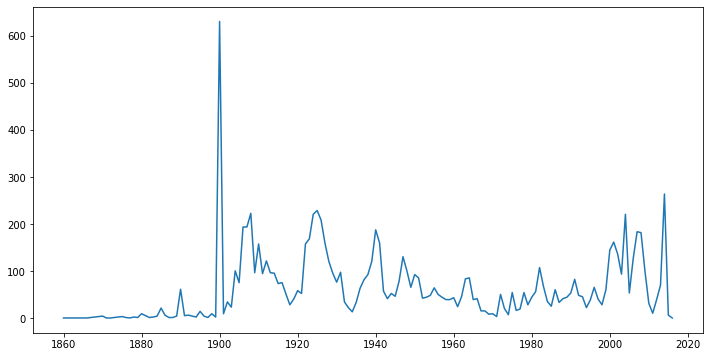

In [163]:
plt.figure(figsize=(12, 6))
year_counts = data['yearbuilt'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.show()

In [173]:
year_counts = pd.Series(np.floor(year_counts.index / 20 - 93), year_counts.index)
year_counts

1860.0    0.0
1866.0    0.0
1870.0    0.0
1871.0    0.0
1872.0    0.0
         ... 
2012.0    7.0
2013.0    7.0
2014.0    7.0
2015.0    7.0
2016.0    7.0
Length: 146, dtype: float64

In [177]:
data.loc[:, 'yearbuilt'] = data['yearbuilt'].apply(lambda x: year_counts[x]).astype('str')

In [182]:
data.loc[:, 'yearbuilt'] = ['yb_{}'.format(yb)[:-2] for yb in data['yearbuilt'].values]

In [185]:
yb_values = ohe_enc.fit_transform(data[['yearbuilt']]).toarray()
yb_columns = ohe_enc.categories_[0]
yb_df = pd.DataFrame(yb_values, columns=yb_columns)
yb_df.head(5)

,yb_0,yb_1,yb_2,yb_3,yb_4,yb_5,yb_6,yb_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [187]:
data = pd.concat([data, yb_df], axis=1)
data.head(5)

,index,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,yearbuilt,zestimate,zindexvalue,...,SingleFamily,Townhouse,yb_0,yb_1,yb_2,yb_3,yb_4,yb_5,yb_6,yb_7
0,0,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,yb_7,1167508.0,"975,700",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1.0,1.0,903.0,750000.0,37.777641,-122.393417,yb_7,823719.0,"975,700",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,yb_7,1708594.0,"1,277,600",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,yb_3,2411236.0,"1,277,600",...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,yb_2,1918539.0,"1,248,000",...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [192]:
data = data.drop(['index', 'latitude', 'longitude', 'yearbuilt', 'zindexvalue', 'lot_size', 'sales_year', 'zipcode'], axis=1)

In [229]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()

In [287]:
X = data.drop(['lastsoldprice', 'addr_label', 'zestimate'], axis=1)
X = X.drop(['yb_0', 'yb_1', 'yb_2', 'yb_3', 'yb_4', 'yb_5', 'yb_6', 'yb_7', 'otherrooms', 'quartal', 'half_bath', 'Miscellaneous', 'bedrooms'], axis=1)
cat_cols = ['Condominium', 'Duplex', 'MultiFamily2To4', 'SingleFamily', 'Townhouse',
#             'Miscellaneous',
#            'yb_0', 'yb_1', 'yb_2', 'yb_3', 'yb_4', 'yb_5', 'yb_6', 'yb_7'
           ]
dig_cols = [x for x in X.columns if x not in cat_cols]

X_cat = X[cat_cols]
X_dig = pd.DataFrame(stand_scaler.fit_transform(X[dig_cols]), columns=dig_cols)
X = pd.concat([X_dig, X_cat], axis=1)
y = data['lastsoldprice']

In [302]:
X = data[['zestimate', 'sqft_cost_mean', 'finishedsqft']]
y = data['lastsoldprice']

In [314]:
X = data.drop(['z_address', 'neighborhood', 'usecode', 'lastsoldprice', 'zestimate', 'zindexvalue', 'zpid'], axis=1)
y = data['lastsoldprice']

In [315]:
X.head(5)

,bathrooms,bedrooms,finishedsqft,latitude,longitude,totalrooms,yearbuilt,zipcode
0,2.0,2.0,1043.0,37.778705,-122.412635,4.0,2007.0,94103.0
1,1.0,1.0,903.0,37.777641,-122.393417,3.0,2004.0,94107.0
2,4.0,3.0,1425.0,37.759198,-122.396516,6.0,2003.0,94107.0
3,3.0,3.0,2231.0,37.761886,-122.396769,10.0,1927.0,94107.0
4,3.0,3.0,1300.0,37.740795,-122.413453,4.0,1900.0,94110.0


In [316]:
X.shape, y.shape

((11330, 8), (11330,))

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [318]:
X_train.shape, X_test.shape

((8497, 8), (2833, 8))

In [319]:
y_train.shape, y_test.shape

((8497,), (2833,))

In [205]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# train_predict = lin_reg.predict(X_train)
# test_predict = lin_reg.predict(X_test)

# print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
# print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 241037.85142131275
Test MAE: 234827.10561114433


In [237]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# train_predict = lin_reg.predict(X_train)
# test_predict = lin_reg.predict(X_test)

# print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
# print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 240744.73215398486
Test MAE: 232304.56052713285


### После удаления "zestimate"

In [248]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# train_predict = lin_reg.predict(X_train)
# test_predict = lin_reg.predict(X_test)

# print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
# print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 314296.45165330655
Test MAE: 315141.5490656657


In [273]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# train_predict = lin_reg.predict(X_train)
# test_predict = lin_reg.predict(X_test)

# print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
# print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 316088.8966556166
Test MAE: 314563.38298996555


In [282]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# train_predict = lin_reg.predict(X_train)
# test_predict = lin_reg.predict(X_test)

# print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
# print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 314516.1584080468
Test MAE: 317272.65794874146


In [294]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

train_predict = lin_reg.predict(X_train)
test_predict = lin_reg.predict(X_test)

print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 310531.20759532537
Test MAE: 321702.9247701427


### Только Zestimate

In [300]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# train_predict = lin_reg.predict(X_train)
# test_predict = lin_reg.predict(X_test)

# print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
# print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 249847.78087869333
Test MAE: 250277.6972452999


In [305]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# train_predict = lin_reg.predict(X_train)
# test_predict = lin_reg.predict(X_test)

# print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
# print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 242953.2190821022
Test MAE: 250644.02892088098


In [307]:
print('Zest MAE: {}'.format(mean_absolute_error(data.lastsoldprice, data.zestimate)))

Zest MAE: 324131.321051011


### Без предобработки данных

In [320]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

train_predict = lin_reg.predict(X_train)
test_predict = lin_reg.predict(X_test)

print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 407233.8005517007
Test MAE: 411044.6523153788


In [207]:
data.lastsoldprice.mean()

1301237.9525813404

In [295]:
sort_ind = np.argsort(np.abs(lin_reg.coef_))[::-1]
for x,y in zip(lin_reg.coef_[sort_ind], X.columns[sort_ind]):
    print('{}: {}'.format(x, y))

548609.5571803789: finishedsqft
-476928.4046276769: Duplex
389108.51277379744: SingleFamily
281484.95526176604: sqft_cost_mean
251490.77616249258: Townhouse
248598.89838409013: region_bed_cost
141407.35864943752: Condominium
-133116.19342208345: MultiFamily2To4
100117.64120579256: bathrooms


In [284]:
X.columns[sort_ind][-3:]

Index(['half_bath', 'Miscellaneous', 'bedrooms'], dtype='object')

In [311]:
data.columns

Index(['z_address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldprice',
       'latitude', 'longitude', 'neighborhood', 'totalrooms', 'usecode',
       'yearbuilt', 'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [1]:
!pip install pandas_profiling

  Created wheel for confuse: filename=confuse-1.1.0-cp37-none-any.whl size=17577 sha256=be6fef2b99343d6a2bd36e87c93ebc84eab49fb219c840108f7b57d9268fc43f
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\f6\8b\23\41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27090 sha256=f76ec745cc5d38670e9ed20ff199f617563775d0c072095d749cbeeb41f387d1
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291997 sha256=49c94a7c5690a66af8060ddff9d8f2c63a9a80ffb4bc3f6f8b1139e8a40c2079
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\07\1c\dc\6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built confuse htmlmin imagehash
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully u

ERROR: phik 0.10.0 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'c:\\users\\user\\anaconda3\\lib\\site-packages\\~atplotlib\\ft2font.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
import pandas_profiling

In [ ]:
data.shape

In [ ]:
np.inf # Бесконечность

In [ ]:
# Удаление дубликатов
data.drop_duplicates().shape

In [ ]:
data.profile_report()